# Emerging Technologies Project 2020
***

# Project Instructions

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

## Research

### Importing Necessary Libraries

In [1]:
# scientific computing with Python
import numpy as np
# plotting
import matplotlib.pyplot as plt
# Data frames.
import pandas as pd
# machine learning
import tensorflow
# importing keras from tensorflow package used for deeplearning
from tensorflow import keras
# Shuffle arrays or sparse matrices in a consistent way.
from sklearn.utils import shuffle
# import keras sequential model.
from tensorflow.keras.models import Sequential
# importing keras layers
from tensorflow.keras.layers import Dense, Dropout
# importing optimizers.
from tensorflow.keras.optimizers import Adam
# importing metrics for accuracy calc
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Set data type to float64.
keras.backend.set_floatx('float64')

### Keras

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow.Keras is the high-level API of TensorFlow 2.0: an approchable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity [1].

### Neural Networks

Neural Networks are used to solve a lot of challenging artificial intelligence problems. They often outperform traditional machine learning models because they have the advantages of non-linearity, variable interactions, and customizability [4].

## Loading & Visualizing PowerProduction DataSet

In order to better grasp the data we deal with, we need to load and visualize it. This gives us some insights into the data and allows us to suit a better Neural Network. To read the dataset, we use Pandas and to map it, Matplotlib.

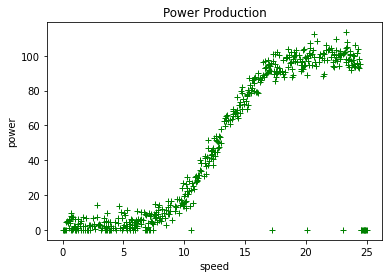

In [2]:
# Read data from data.csv into pandas dataframe.
df = pd.read_csv('powerproduction.csv')
X, y = df['speed'], df['power']

# Plot data to visualize it.
plt.plot(X, y, 'g+')
plt.title('Power Production')
plt.xlabel('speed')
plt.ylabel('power')
plt.show()

## Train And Test

We need to provide the Keras Neural Network with training and testing datasets, so we split the dataset into two distributions, one for training **80 %** and one for testing **20 %**.To prevent overfitting or learning a pattern, we shuffle and normalize the datasets.

In [3]:
# Split data into train, test and validation distributions.
df = shuffle(df)
X_train, y_train = df['speed'][:400], df['power'][:400]
X_test, y_test = df['speed'][400:], df['power'][400:]

## Model Creation and Fitting

We can now build and train a neural network after splitting data into training and test sets. We will use three dense layers of a sequential model. The first layer contains 128 neurons and the activation function of RELU, the second layer contains 256 neurons and the activation function of RELU, and the output layer contains only one neuron. In order to prevent overfitting, this model also utilizes dropouts.

### Sequential Model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor [6].

### Keras Layers

Layers are the basic building blocks of neural networks in Keras.A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights) [7].

 ### Why use ReLU (Rectified Linear Activation Function)?
 
The ReLU [11] function is another non-linear activation function that has gained popularity in the deep learning domain. ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.
This means that the neurons will only be deactivated if the output of the linear transformation is less than 0. The plot below will help you understand this better-

### Keras Optimizer
An optimizer is one of the two arguments required for compiling a Keras model.
Optimizer that implements the Adam algorithm [8].
### Adam Optimizer
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order 
and second-order moments [9].

In [8]:
# Fitting  model to data.
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=400)

model.summary()

Epoch 1/400
13/13 [==============================] - 1s 14ms/step - loss: 3363.4391 - val_loss: 2239.4281
Epoch 2/400
13/13 [==============================] - 0s 6ms/step - loss: 1939.1871 - val_loss: 803.1316
Epoch 3/400
13/13 [==============================] - 0s 5ms/step - loss: 728.7606 - val_loss: 354.1735
Epoch 4/400
13/13 [==============================] - 0s 5ms/step - loss: 866.3775 - val_loss: 352.8580
Epoch 5/400
13/13 [==============================] - 0s 5ms/step - loss: 636.7413 - val_loss: 370.4936
Epoch 6/400
13/13 [==============================] - 0s 6ms/step - loss: 619.1413 - val_loss: 360.5342
Epoch 7/400
13/13 [==============================] - 0s 5ms/step - loss: 553.8717 - val_loss: 357.3822
Epoch 8/400
13/13 [==============================] - 0s 5ms/step - loss: 633.0940 - val_loss: 367.2892
Epoch 9/400
13/13 [==============================] - 0s 5ms/step - loss: 552.9984 - val_loss: 350.5469
Epoch 10/400
13/13 [==============================] - 0s 6ms/step - l

Epoch 80/400
13/13 [==============================] - 0s 6ms/step - loss: 564.7727 - val_loss: 285.6088
Epoch 81/400
13/13 [==============================] - 0s 7ms/step - loss: 529.1268 - val_loss: 248.4971
Epoch 82/400
13/13 [==============================] - 0s 7ms/step - loss: 594.7267 - val_loss: 260.8669
Epoch 83/400
13/13 [==============================] - 0s 6ms/step - loss: 551.5366 - val_loss: 255.0631
Epoch 84/400
13/13 [==============================] - 0s 6ms/step - loss: 487.9480 - val_loss: 243.5979
Epoch 85/400
13/13 [==============================] - 0s 6ms/step - loss: 459.3317 - val_loss: 260.2370
Epoch 86/400
13/13 [==============================] - 0s 6ms/step - loss: 503.4369 - val_loss: 258.7243
Epoch 87/400
13/13 [==============================] - 0s 5ms/step - loss: 639.8460 - val_loss: 252.4713
Epoch 88/400
13/13 [==============================] - 0s 5ms/step - loss: 619.9210 - val_loss: 258.5987
Epoch 89/400
13/13 [==============================] - 0s 5ms/ste

13/13 [==============================] - 0s 5ms/step - loss: 615.7423 - val_loss: 228.7198
Epoch 159/400
13/13 [==============================] - 0s 5ms/step - loss: 422.1569 - val_loss: 225.1280
Epoch 160/400
13/13 [==============================] - 0s 5ms/step - loss: 468.3843 - val_loss: 275.3128
Epoch 161/400
13/13 [==============================] - 0s 5ms/step - loss: 568.0227 - val_loss: 229.6811
Epoch 162/400
13/13 [==============================] - 0s 5ms/step - loss: 546.4661 - val_loss: 250.3261
Epoch 163/400
13/13 [==============================] - 0s 5ms/step - loss: 642.5265 - val_loss: 239.5490
Epoch 164/400
13/13 [==============================] - 0s 5ms/step - loss: 681.4562 - val_loss: 248.1374
Epoch 165/400
13/13 [==============================] - 0s 5ms/step - loss: 654.7367 - val_loss: 231.3927
Epoch 166/400
13/13 [==============================] - 0s 5ms/step - loss: 524.3512 - val_loss: 230.6784
Epoch 167/400
13/13 [==============================] - 0s 6ms/step - 

13/13 [==============================] - 0s 5ms/step - loss: 519.5797 - val_loss: 241.7101
Epoch 237/400
13/13 [==============================] - 0s 5ms/step - loss: 532.5421 - val_loss: 237.4332
Epoch 238/400
13/13 [==============================] - 0s 5ms/step - loss: 497.7608 - val_loss: 240.3522
Epoch 239/400
13/13 [==============================] - 0s 5ms/step - loss: 553.1228 - val_loss: 257.2333
Epoch 240/400
13/13 [==============================] - 0s 5ms/step - loss: 583.7861 - val_loss: 230.0960
Epoch 241/400
13/13 [==============================] - 0s 5ms/step - loss: 664.7050 - val_loss: 227.5048
Epoch 242/400
13/13 [==============================] - 0s 5ms/step - loss: 548.3312 - val_loss: 255.7527
Epoch 243/400
13/13 [==============================] - 0s 5ms/step - loss: 509.0879 - val_loss: 222.5518
Epoch 244/400
13/13 [==============================] - 0s 5ms/step - loss: 595.3293 - val_loss: 234.0321
Epoch 245/400
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 5ms/step - loss: 612.6214 - val_loss: 237.6936
Epoch 315/400
13/13 [==============================] - 0s 5ms/step - loss: 658.7882 - val_loss: 237.3372
Epoch 316/400
13/13 [==============================] - 0s 5ms/step - loss: 493.4577 - val_loss: 227.7450
Epoch 317/400
13/13 [==============================] - 0s 5ms/step - loss: 639.4624 - val_loss: 246.5554
Epoch 318/400
13/13 [==============================] - 0s 5ms/step - loss: 376.7039 - val_loss: 229.6121
Epoch 319/400
13/13 [==============================] - 0s 5ms/step - loss: 568.0823 - val_loss: 267.5465
Epoch 320/400
13/13 [==============================] - 0s 5ms/step - loss: 440.6980 - val_loss: 219.8755
Epoch 321/400
13/13 [==============================] - 0s 5ms/step - loss: 648.5239 - val_loss: 245.5096
Epoch 322/400
13/13 [==============================] - 0s 5ms/step - loss: 605.9400 - val_loss: 257.7093
Epoch 323/400
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 5ms/step - loss: 402.5722 - val_loss: 217.5809
Epoch 393/400
13/13 [==============================] - 0s 5ms/step - loss: 375.6079 - val_loss: 247.4520
Epoch 394/400
13/13 [==============================] - 0s 5ms/step - loss: 566.2531 - val_loss: 300.2348
Epoch 395/400
13/13 [==============================] - 0s 5ms/step - loss: 496.7275 - val_loss: 223.1596
Epoch 396/400
13/13 [==============================] - 0s 5ms/step - loss: 667.2198 - val_loss: 236.9274
Epoch 397/400
13/13 [==============================] - 0s 5ms/step - loss: 612.7029 - val_loss: 223.5682
Epoch 398/400
13/13 [==============================] - 0s 5ms/step - loss: 697.8765 - val_loss: 240.7183
Epoch 399/400
13/13 [==============================] - 0s 5ms/step - loss: 557.9191 - val_loss: 244.3849
Epoch 400/400
13/13 [==============================] - 0s 6ms/step - loss: 441.6512 - val_loss: 233.1105
Model: "sequential_1"
_______________________________________________

## Visualizing Loss

Loss of training and validation is very crucial for every Neural Network. In reality, during training, it is a clue that tells us whether or not our model suits as planned. A history feature of the Keras model provides a plot for losses.

<AxesSubplot:>

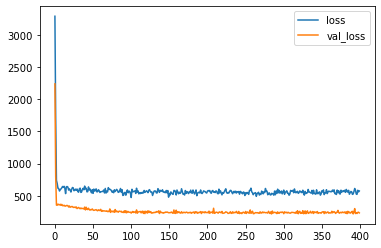

In [9]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Model Accuracy

To verify our model's accuracy, we measure mean squared error and mean absolute errors.

### Mean Squared Error
The mean_squared_error function computes mean square error,
a risk metric corresponding to the expected value of the squared (quadratic) error or loss [10].
### Mean Absolute Error
The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or -norm loss [10].

In [10]:
# Calculatting errors 
predictions = model.predict(X_test)
# mean squared error
print("Squared =" ,np.sqrt(mean_squared_error(y_test,predictions)))
# mean absolute error
print("Absolute =",mean_absolute_error(y_test,predictions))


Squared = 15.267956389507487
Absolute = 11.225650628406973


## Save Model
We have to save it in.h5 format to use this model on a Flask server.

In [7]:
# Save model to use in flask server.
model.save('model.h5')

# References

[1] https://keras.io/about/

Keras Regression Tutorial

[2] https://www.tensorflow.org/tutorials/keras/regression

How to make predictions using Keras Regression

[3] https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

[4] https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Artificial Neural Networks
https://web.microsoftstream.com/video/b3c0a6ba-86b6-4f4a-bc1d-48d26c868bea

Weights and biases
https://web.microsoftstream.com/video/89718bf7-173b-4c24-8922-a81b31296f7e

Building a neuron
https://web.microsoftstream.com/video/85a3874f-778a-45b2-9b41-f3b525fe9549

Neurons in keras
https://web.microsoftstream.com/video/7ffcdaef-72ef-4ad1-96c3-acc92f8e184d?list=studio

[5] https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

[6] https://keras.io/guides/sequential_model/

[7] https://keras.io/api/layers/

[8] https://keras.io/api/optimizers/

[9] https://keras.io/api/optimizers/adam/

[10] https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

[11] https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/


***

#### End